In [1]:
from utils import Handwritten

## Augmentations checking

In [5]:
import os
from typing import Any, Tuple
import sys
sys.path.append("/home/vishwesh/Projects/Ink-WSI")
# sys.path.append("/home/ramanav/projects/rrg-amartel/ramanav/Projects/InkFilter")
from pathlib import Path
import torch
import random
import numpy as np
from torchvision import transforms

from utils.inkgeneration import InkGenerator
from matplotlib import pyplot as plt
import trainer
from utils import Vectorize_WSIs


In [56]:
@trainer.Dataset.register("ink_test")
class Mnist_Dataset(trainer.Dataset):
    IMG_SIZE = 256
    NUM_OPS = 3


    def get_transforms(self) -> Tuple[Any, Any]:
        train_augs = transforms.Compose([
                transforms.Resize(size=(self.IMG_SIZE, self.IMG_SIZE)),
                # transforms.RandAugment(num_ops=self.NUM_OPS),
                transforms.RandomChoice([
                    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
                    transforms.RandomAutocontrast()]
                    ,p=[0.5,0.5]),
                transforms.ColorJitter(brightness=0.3,contrast=0.3),
                transforms.RandomChoice([
                    transforms.RandomVerticalFlip(),
                    transforms.RandomHorizontalFlip(),
                    transforms.RandomRotation(degrees=(0, 180))]
                    ,p=[0.33,0.33,0.33]),
                transforms.ToTensor(),
            ])

        test_augs = transforms.Compose([
                transforms.Resize(size=(self.IMG_SIZE, self.IMG_SIZE)),
                transforms.ToTensor(),
            ])
        return train_augs, test_augs

    def get_loaders(self):
        
        image_pth = str(Path(self.path)/"104S.tif")
        mask_pth = str(Path(self.path)/"images")

        trainset = Vectorize_WSIs(image_pth=image_pth,
                                  mask_pth=mask_pth,
                                  template_pth=self.kwargs["template_pth"],
                                  tile_h=self.kwargs["tile_h"],
                                  tile_w=self.kwargs["tile_w"],
                                  tile_stride_factor_h=self.kwargs["tile_stride_factor_h"],
                                  tile_stride_factor_w=self.kwargs["tile_stride_factor_w"],
                                  mode="train",
                                  train_split=self.kwargs["train_split"],
                                  transform=self.train_transform,
                                  colors=self.kwargs["colors"])
        
        testset = Vectorize_WSIs(image_pth=image_pth,
                                  mask_pth=mask_pth,
                                  template_pth=self.kwargs["template_pth"],
                                  tile_h=self.kwargs["tile_h"],
                                  tile_w=self.kwargs["tile_w"],
                                  tile_stride_factor_h=self.kwargs["tile_stride_factor_h"],
                                  tile_stride_factor_w=self.kwargs["tile_stride_factor_w"],
                                  mode="val",
                                  train_split=self.kwargs["train_split"],
                                  transform=self.test_transform,
                                  colors=self.kwargs["colors"])


        trainloader = torch.utils.data.DataLoader(trainset, batch_size=self.train_batch_size, num_workers=4,shuffle=True,pin_memory=True)
        testloader = torch.utils.data.DataLoader(testset, batch_size=self.test_batch_size,shuffle=True, num_workers=4,pin_memory=True)

        return trainset, trainloader, testset, testloader

In [57]:
dataset = trainer.Dataset.create("ink_test",
                                 path="/home/vishwesh/Projects/testinput_104S",
                                 test_batch_size=16,
                                 train_batch_size=16,
                                 template_pth="/home/vishwesh/Projects/Ink_Correction/Data/by_class",
                                 tile_h=256,
                                 tile_w=256,
                                 tile_stride_factor_h=5,
                                 tile_stride_factor_w=5,
                                 colors=[("black","#28282B"),("#002d04","#2a7e19"),("#000133","skyblue"),("#1f0954","#6d5caf"),("#a90308","#ff000d")],
                                 train_split=0.8
)
print(len(dataset.trainset))

Loading wsis.. 1/1: : 1it [00:02,  2.99s/it]


Loading the data...


100%|██████████| 10/10 [00:00<00:00, 85.79it/s]
Loading wsis.. 1/1: : 1it [00:02,  2.88s/it]


Loading the data...


100%|██████████| 10/10 [00:00<00:00, 65.45it/s]

954


1


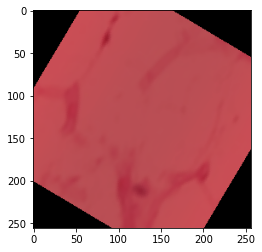

In [110]:
idx = np.random.randint(0,len(dataset.trainset))
data, label = dataset.trainset[idx]
plt.imshow(data.permute(1,2,0))
print(label)

In [3]:
import numpy as np
import random
random_seed = 2022
np.random.seed(random_seed)
random.seed(random_seed)

ink_templates = Handwritten(path="/home/vishwesh/Projects/Ink_Correction/Data/by_class", n=10000)

Loading the data...


100%|██████████| 10000/10000 [00:01<00:00, 9064.25it/s]


In [4]:
img = ink_templates[4501]

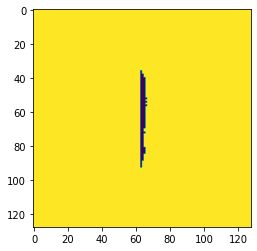

In [14]:
from matplotlib import pyplot as plt
img = ink_templates[4509]
plt.imshow(img)
plt.show()

In [1]:
import os
import trainer
import sys
sys.path.append("/home/vishwesh/Projects/Ink-WSI")
import utils
from pathlib import Path
import torch
import random
import numpy as np

from utils.inkgeneration import InkGenerator
from matplotlib import pyplot as plt

# parent_path = Path("/localscratch")
# imgs_path = parent_path / Path([p for p in os.listdir(parent_path) if "ramanav" in p ][0]) / "SSL_training"
random_seed = 2022
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed)  # if use multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)
random.seed(random_seed)


dataset = trainer.Dataset.create("ink",
                                 path="/home/vishwesh/Projects/testinput_104S",
                                 test_batch_size=16,
                                 train_batch_size=16,
                                 template_pth="/home/vishwesh/Projects/Ink_Correction/Data/by_class",
                                 tile_h=256,
                                 tile_w=256,
                                 tile_stride_factor_h=3,
                                 tile_stride_factor_w=3,
                                 colors=[("black","#28282B"),("#002d04","#2a7e19"),("#000133","skyblue"),("#1f0954","#6d5caf"),("#a90308","#ff000d")],
                                 train_split=0.8
)

Loading wsis.. 1/1: : 1it [01:08, 68.82s/it]


: 

: 

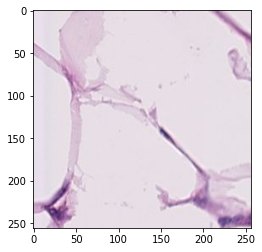

In [2]:
img = dataset.trainset.all_image_tiles_hr[523]
plt.imshow(img)

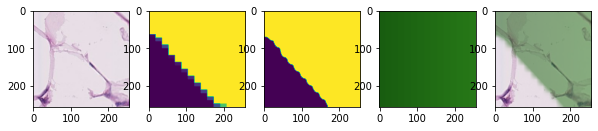

In [81]:
dataset.trainset.ink_generator.get_plots(img)
plt.show()

In [7]:
import os
import sys
from typing import Tuple

import cv2
from matplotlib import pyplot as plt
import numpy as np
import openslide

sys.path.append("/home/vishwesh/Projects/Ink-WSI")
from utils import ImageRegister

def get_homography(src_img:np.array,
                   dest_img:np.array,
                   plot:bool=True
                   ) ->Tuple[np.array,np.array]:
    """
    Given two images , gets projection matrix such that dest_img = H.src_img
    Returns:
        H: Projection matrix
        proj_img: Projected image
    """
    src_object = ImageRegister(image=src_img)
    dest_object = ImageRegister(image=dest_img)
    
    # prepare two images for registration
    src_object.prepare_img_registration()
    dest_object.prepare_img_registration()

    # perform registration
    good, M = src_object.perform_registration(dest_object, draw_match=plot)

    #Obtain projected image
    proj_object = ImageRegister(image=src_img)
    proj_object.warp_img(M, (dest_img.shape[1], dest_img.shape[0]))

    return M, proj_object

def wsi_registration(src_slide:openslide.OpenSlide,
                     dest_slide:openslide.OpenSlide,
                     plot:bool = True) -> np.array:
    """
    Registers two whole slides and outputs the project matrix that can be used for the original slide
    """
    src_dimension = src_slide.dimensions
    dest_dimension = dest_slide.dimensions

    #Extract thumbnail from given slide
    src_thumb = np.asarray(src_slide.get_thumbnail((512,512)).convert("RGB"))
    dest_thumb = np.asarray(dest_slide.get_thumbnail((512,512)).convert("RGB"))

    #Get the scaling for getting M
    src_scaling = np.array([
                            [src_dimension[1]/src_thumb.shape[0], 0, 0],
                            [0,src_dimension[0]/src_thumb.shape[1],0],
                            [0,0,1]]
                            )
    dest_scaling = np.array([
                            [dest_dimension[1]/dest_thumb.shape[0], 0, 0],
                            [0,dest_dimension[0]/dest_thumb.shape[1],0],
                            [0,0,1]]
                            )
    
    #Get projection matrix for thumbnails
    M, proj_object = get_homography(src_thumb,dest_thumb,plot=plot)
    M_inv, _ = get_homography(dest_thumb,src_thumb,False)
    M_adjusted = dest_scaling @ M @ np.linalg.inv(src_scaling)
    M_inv_adjusted = src_scaling @ M_inv @ np.linalg.inv(dest_scaling)
    
    return M_adjusted, M_inv_adjusted, M, M_inv

def adjust_origin(x_shift:int,y_shift:int,M:np.array)->np.array:
    """
    Adjusts the projection matrix based on given shifted coordinates
    """
    M_adj = np.copy(M)
    M_adj[:,-1] = M_adj[:,-1] + M_adj[:,:-1] @ np.array([x_shift,y_shift])
    return M_adj

def transform_coords(x,y,M):
    p = np.array((x,y,1)).reshape((3,1))
    temp_p = M.dot(p)
    sum = np.sum(temp_p ,1)
    px = int(round(sum[0]/sum[2]))
    py = int(round(sum[1]/sum[2]))
    return px,py

img_ink = openslide.OpenSlide("/home/vishwesh/Projects/Ink-WSI/images/121504.svs")
img_noink = openslide.OpenSlide("/home/vishwesh/Projects/Ink-WSI/images/114793.svs")

M_adj,M_inv_adj,M,M_inv = wsi_registration(img_noink,img_ink,plot=False)
print("M_adjusted: {}".format(M_adj))

M_adjusted: [[ 5.04665141e-01  4.73484163e-04  2.07051162e+03]
 [-6.03453672e-05  5.02157691e-01 -8.32940319e+02]
 [ 1.70608773e-08  7.22824106e-09  1.00000000e+00]]


In [2]:
M

array([[ 7.33163424e-01,  4.36944492e-04,  1.33967715e+01],
       [-2.33007033e-04,  7.31157548e-01, -5.29380005e+00],
       [ 2.84749170e-06, -1.52028891e-06,  1.00000000e+00]])

In [3]:
M_inv

array([[ 1.36380237e+00, -1.20707169e-03, -1.82227786e+01],
       [ 3.38013632e-04,  1.36735165e+00,  7.26097716e+00],
       [-3.10072151e-06,  5.47853528e-07,  1.00000000e+00]])

In [8]:
thumb_ink = np.asarray(img_ink.get_thumbnail((512,512)).convert("RGB"))
thumb_noink = np.asarray(img_noink.get_thumbnail((512,512)).convert("RGB"))

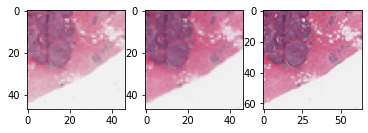

In [11]:
_, proj_object = get_homography(thumb_noink,thumb_ink,plot=False)
# Thumb_noink -> Thumb_ink
coords_noink = (321, 218)
trans_coordsnoink2 = transform_coords(coords_noink[0]+64,coords_noink[1]+64,M)
trans_coordsnoink = transform_coords(*coords_noink,M)
plt.subplot(1,3,1)
plt.imshow(thumb_ink[trans_coordsnoink[1]:trans_coordsnoink2[1],trans_coordsnoink[0]:trans_coordsnoink2[0],:])
plt.subplot(1,3,2)
plt.imshow(proj_object.warped[trans_coordsnoink[1]:trans_coordsnoink2[1],trans_coordsnoink[0]:trans_coordsnoink2[0],:])
plt.subplot(1,3,3)
plt.imshow(thumb_noink[coords_noink[1]:coords_noink[1]+64,coords_noink[0]:coords_noink[0]+64,:])

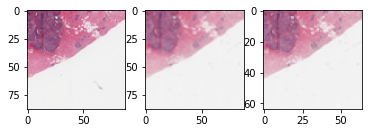

In [12]:
_, proj_object = get_homography(thumb_ink,thumb_noink,plot=False)
# Thumb_ink -> Thumb_noink
coords_noink = trans_coordsnoink
trans_coordsnoink2 = transform_coords(coords_noink[0]+64,coords_noink[1]+64,M_inv)
trans_coordsnoink = transform_coords(*coords_noink,M_inv)
plt.subplot(1,3,1)
plt.imshow(thumb_noink[trans_coordsnoink[1]:trans_coordsnoink2[1],trans_coordsnoink[0]:trans_coordsnoink2[0],:])
plt.subplot(1,3,2)
plt.imshow(proj_object.warped[trans_coordsnoink[1]:trans_coordsnoink2[1],trans_coordsnoink[0]:trans_coordsnoink2[0],:])
plt.subplot(1,3,3)
plt.imshow(thumb_ink[coords_noink[1]:coords_noink[1]+64,coords_noink[0]:coords_noink[0]+64,:])

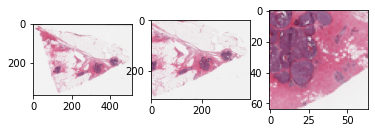

In [13]:
#Shifted coordinates
x_shift, y_shift = (121,56)
noink_test = thumb_noink[y_shift:,x_shift:]
coord_interest = (200,150)
plt.subplot(1,3,1)
plt.imshow(thumb_noink)
plt.subplot(1,3,2)
plt.imshow(noink_test)
plt.subplot(1,3,3)
plt.imshow(noink_test[coord_interest[1]:coord_interest[1]+64,coord_interest[0]:coord_interest[0]+64,:])

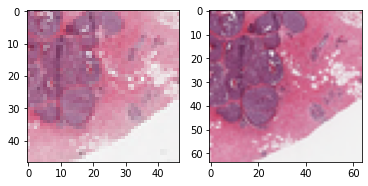

In [14]:
# _, proj_object = get_homography(thumb_noink,thumb_ink,plot=False)
# Thumb_noink -> Thumb_ink
# coords_noink = (321, 218)
M_mod = adjust_origin(x_shift,y_shift, M)
trans_coordsnoink2 = transform_coords(coord_interest[0]+64,coord_interest[1]+64,M_mod)
trans_coordsnoink = transform_coords(*coord_interest,M_mod)
plt.subplot(1,2,1)
plt.imshow(thumb_ink[trans_coordsnoink[1]:trans_coordsnoink2[1],trans_coordsnoink[0]:trans_coordsnoink2[0],:])
plt.subplot(1,2,2)
# plt.imshow(proj_object.warped[trans_coordsnoink[1]:trans_coordsnoink2[1],trans_coordsnoink[0]:trans_coordsnoink2[0],:])
# plt.subplot(1,3,3)
plt.imshow(noink_test[coord_interest[1]:coord_interest[1]+64,coord_interest[0]:coord_interest[0]+64,:])

In [15]:
M

array([[ 7.34233421e-01,  6.89254717e-04,  1.32870596e+01],
       [-8.79123017e-05,  7.31963261e-01, -5.35229412e+00],
       [ 3.86795123e-06,  1.63966719e-06,  1.00000000e+00]])

In [16]:
M_mod

array([[ 7.34233421e-01,  6.89254717e-04,  1.02167902e+02],
       [-8.79123017e-05,  7.31963261e-01,  3.56270111e+01],
       [ 3.86795123e-06,  1.63966719e-06,  1.00055984e+00]])

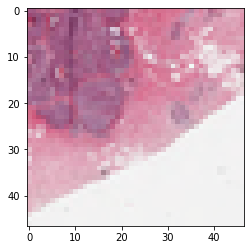

In [78]:
coords_noink = (218,321)
trans_coordsnoink2 = transform_coords(321+64,218+64,M)
trans_coordsnoink = transform_coords(321,218,M)
# trans_coordsnoink = transform_coords(*coords_noink,M)
plt.imshow(thumb_ink[trans_coordsnoink[1]:trans_coordsnoink2[1],trans_coordsnoink[0]:trans_coordsnoink2[0],:])

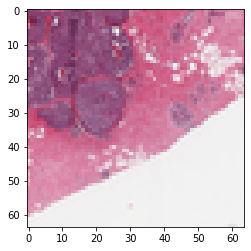

In [79]:
plt.imshow(thumb_noink[coords_noink[0]:coords_noink[0]+64,coords_noink[1]:coords_noink[1]+64,:])

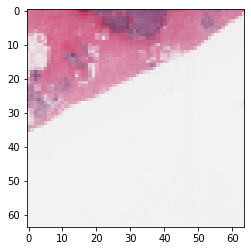

In [50]:
M, proj_object = get_homography(thumb_noink,thumb_ink,plot=False)
plt.imshow(proj_object.warped[trans_coordsnoink[0]:trans_coordsnoink[0]+64,trans_coordsnoink[1]:trans_coordsnoink[1]+64,:])

In [ ]:
plt.imshow()

In [70]:
transform_coords(x1,y1,M)

(249, 154)

In [71]:
transform_coords(x2,y2,M)

(296, 201)

In [69]:
print(a,b,c,d)

153 200 248 295


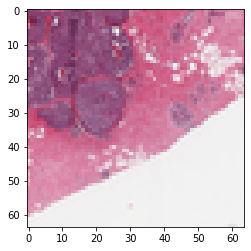

In [62]:
plt.imshow(thumb_noink[y1:y2,x1:x2,:])

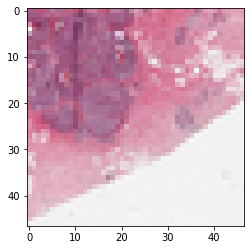

In [63]:
plt.imshow(thumb_ink[a:b,c:d])

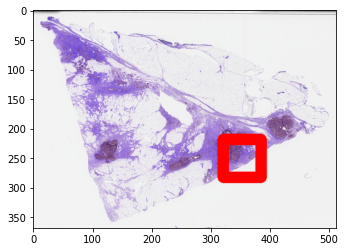

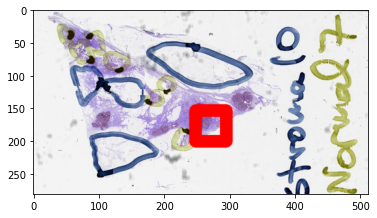

In [68]:
#Draw regions of boundary
x1, y1 = (321,218) 
x2, y2 = x1+64, y1+64

ink_obj = ImageRegister(image=thumb_ink)
noink_obj = ImageRegister(image=thumb_noink)

noink_obj.draw_region(y1, y2, x1, x2)

a, b, c, d = ImageRegister.project_coordinates(M, x1, y1, x2, y2)
d_roi_real = ink_obj.draw_region(a, b, c, d)




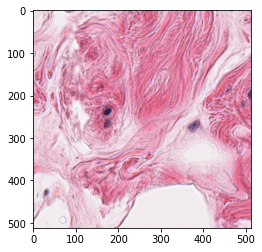

In [18]:
coords_noink = (66000,42743)
noink_patch = img_noink.read_region(coords_noink,0,(512,512))
plt.imshow(noink_patch)

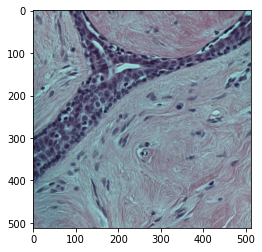

In [15]:
coords = (29944,20722)
ink_patch = img_ink.read_region(coords,0,(512,512))
plt.imshow(ink_patch)

In [23]:


print(coords_noink)
print(transform_coords(coords_noink[1],coords_noink[0],M_adj))

(66000, 42743)
(32272, 23645)


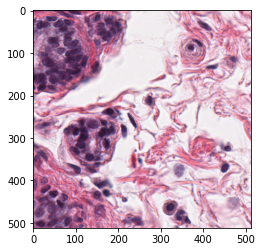

In [28]:
transink_patch = img_noink.read_region((32272,23645),0,(512,512))
plt.imshow(transink_patch)

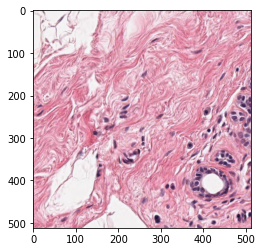

In [29]:
plt.imshow(img_ink.read_region((32272,23645),0,(512,512)))